## **Actividad: Análisis exploratorio con técnicas de agrupamiento**

**Andrés Alejandro Guzmán González - A01633819**

Descarga el conjunto de datos socioeconómicos de los países del mundo, y haz lo siguiente:

In [161]:
# Llamado a librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


df = pd.read_csv('/content/sample_data/country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [162]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [163]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [164]:
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [165]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [166]:
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

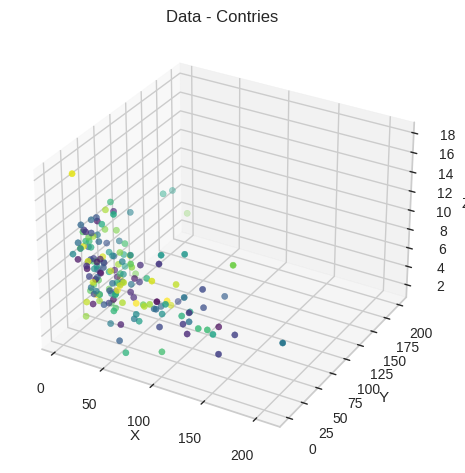

In [167]:
x = df.drop('country', axis=1).values
y = df['country'].values
plot_data(x,y,"Data - Contries")

1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.


----- K-means -----
Labels:  [3 3 0 3 0 0 3 2 2 0 5 5 3 0 0 2 3 3 3 3 3 0 0 1 0 3 3 3 3 2 3 3 3 0 3 0 3
 3 3 0 3 0 5 5 2 0 3 3 3 5 3 0 3 2 2 0 3 3 2 3 5 0 3 3 3 3 3 0 2 3 3 0 0 2
 5 2 3 2 3 0 3 3 1 3 3 0 0 3 3 5 0 7 0 3 3 0 0 3 5 3 0 3 3 3 0 3 3 3 3 3 2
 5 3 3 4 5 3 0 3 3 3 0 5 6 0 0 3 3 5 3 0 0 3 1 5 5 3 0 5 5 3 0 3 0 2 4 3 3
 0 3 3 3 3 0 3 3 3 1 2 2 0 3 3 0 3 3 3]
Centers:  [[1.77357143e+01 4.38476190e+01 6.69952381e+00 4.52071429e+01
  1.61576190e+04 7.26590476e+00 7.33880952e+01 2.06785714e+00
  8.94761905e+03]
 [8.17500000e+00 1.02950000e+02 3.27250000e+00 7.40000000e+01
  7.13750000e+04 1.00885000e+01 7.86250000e+01 1.76750000e+00
  3.88500000e+04]
 [4.29375000e+00 4.31437500e+01 1.07662500e+01 4.01312500e+01
  4.11250000e+04 1.09125000e+00 8.08062500e+01 1.79625000e+00
  4.61125000e+04]
 [6.30642857e+01 3.10392738e+01 6.14821429e+00 4.59448321e+01
  4.32670238e+03 9.84197619e+00 6.49273810e+01 3.89309524e+00
  1.94778571e+03]
 [3.85000000e+00 5.18500000e+01 1.04900000e+01 4.0900

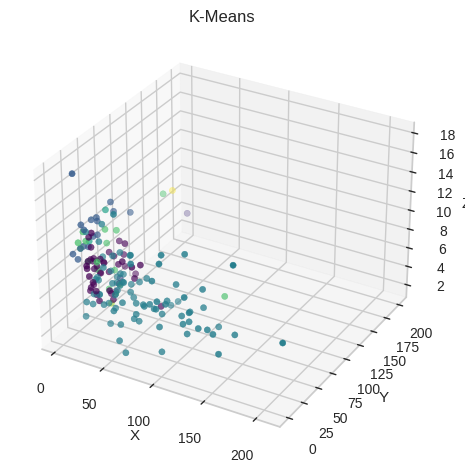

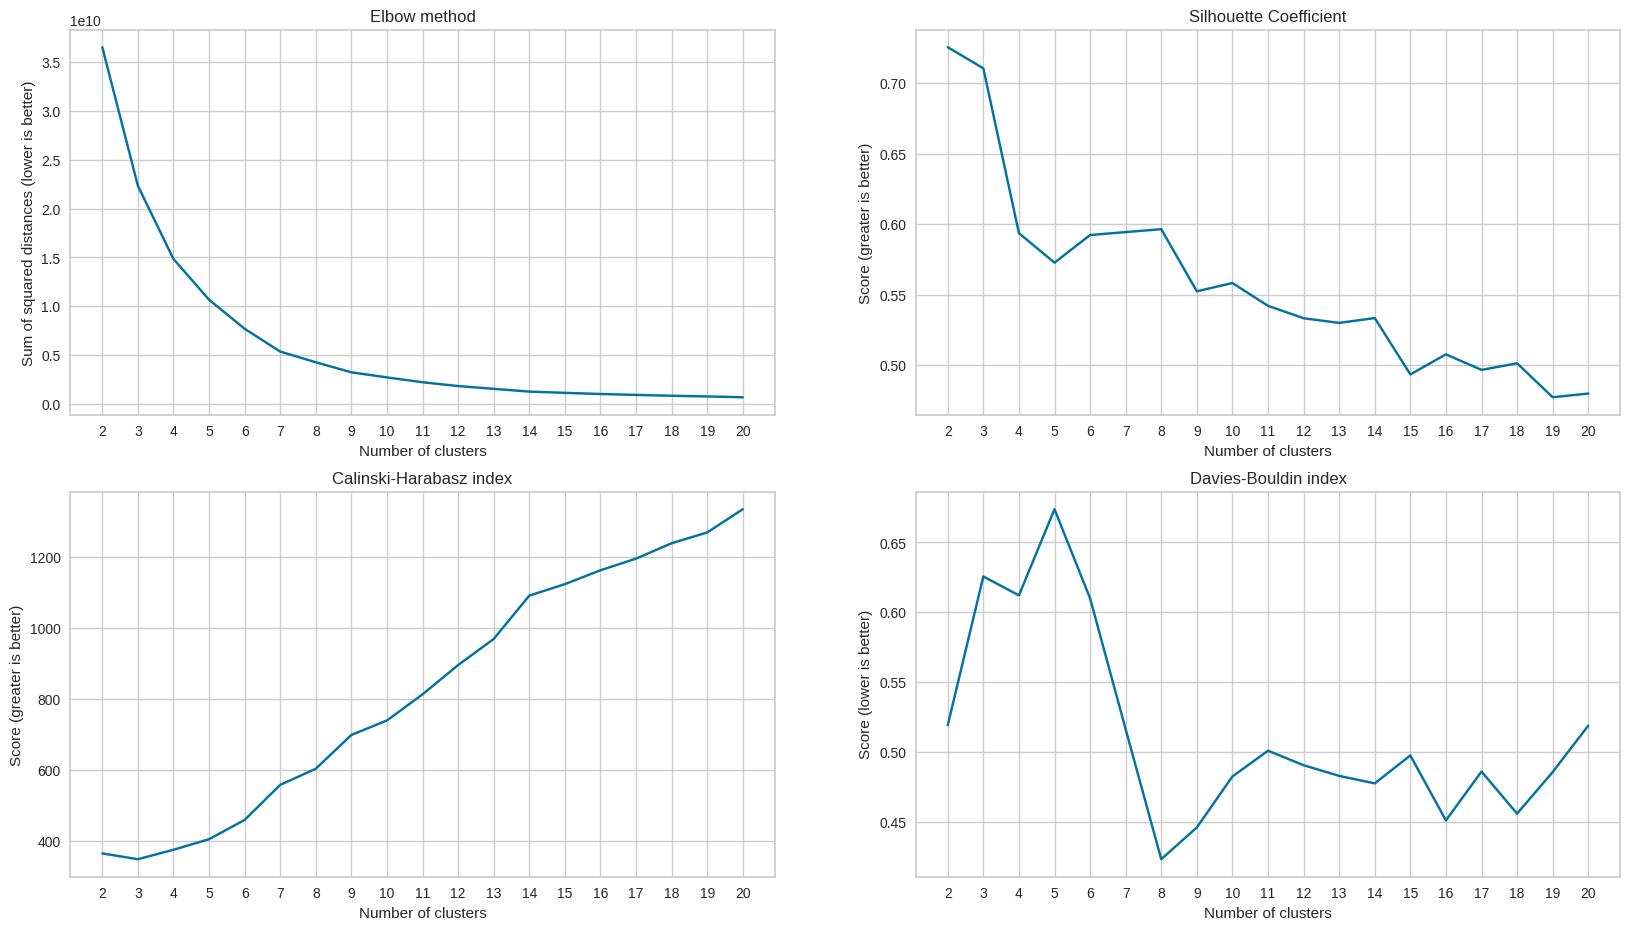

In [168]:
print('----- K-means -----')

kmeans = KMeans(n_clusters=8, n_init=8, random_state=0)
kmeans.fit(x)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(x, clustering_labels, 'K-Means')

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init=k)
    kmeans.fit(x)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(x, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(x, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(x, kmeans.labels_))

print("\n")
fig, axs = plt.subplots(2, 2, figsize=(20,11))

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

2. Repita lo anterior, pero con otro método de agrupamiento que elijas.


----- Dendrogram plot -----


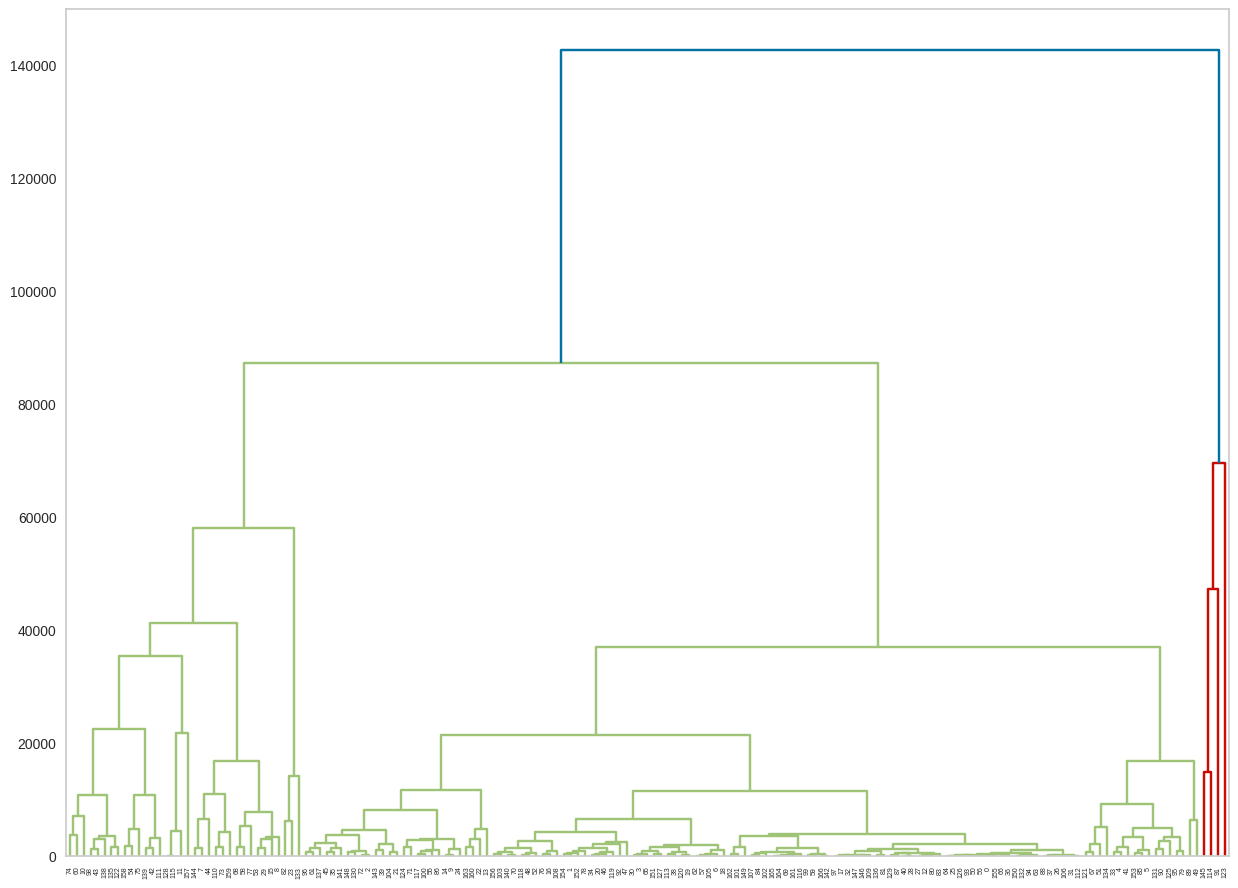

In [169]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(x, 'complete')
labelList = range(1, 11)

plt.figure(figsize=(15,11))
plt.grid(False)
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True, )
plt.show()

----- Aglomerative clustering -----
Labels:  [2 2 2 2 3 3 2 0 0 2 3 3 2 3 2 0 2 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 3 2 2 2
 2 2 2 2 3 3 3 0 2 2 2 2 3 2 3 2 0 0 2 2 2 0 2 3 2 2 2 2 2 2 3 0 2 2 2 2 0
 3 0 2 0 2 3 2 2 0 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0
 3 2 2 1 3 2 2 2 2 2 3 3 1 2 3 2 2 3 2 2 3 2 0 3 3 2 2 3 3 2 2 2 2 0 1 2 2
 2 2 2 2 2 3 2 2 2 0 0 0 3 2 2 3 2 2 2]


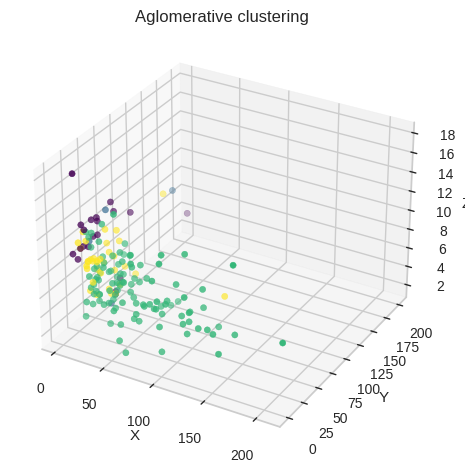

In [170]:
print('----- Aglomerative clustering -----')
agl = AgglomerativeClustering(n_clusters=4).fit(x)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x, clustering_labels, 'Aglomerative clustering')

3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son:
MinosomLinks to an external site.
sklearn-somLinks to an external site.


In [171]:
!pip install sklearn-som

In [172]:
from sklearn_som.som import SOM
_som = SOM(m=167, n=1, dim=9)
_som.fit(x)
predictions = _som.predict(x)
predictions

array([75, 71, 71, 73, 69, 63, 72, 67, 65, 70, 64, 68, 75, 63, 70, 65, 72,
       75, 73, 73, 71, 70, 63, 66, 70, 75, 76, 75, 74, 65, 73, 61, 75, 69,
       71, 71, 75, 76, 73, 70, 74, 69, 68, 64, 67, 71, 71, 72, 72, 68, 75,
       69, 72, 65, 65, 70, 75, 72, 65, 74, 64, 71, 72, 61, 75, 73, 75, 69,
       65, 73, 72, 70, 71, 67, 64, 65, 72, 65, 72, 69, 75, 75, 66, 74, 74,
       63, 70, 75, 76, 69, 69, 66, 71, 61, 61, 69, 71, 75, 64, 74, 70, 62,
       74, 72, 70, 72, 61, 74, 72, 75, 67, 68, 61, 73, 66, 68, 74, 70, 72,
       71, 73, 69, 64, 66, 70, 69, 61, 73, 68, 75, 71, 69, 61, 66, 69, 64,
       75, 71, 64, 68, 72, 71, 74, 70, 67, 66, 75, 75, 71, 62, 61, 73, 71,
       63, 71, 75, 72, 65, 65, 67, 63, 74, 62, 63, 73, 73, 74])

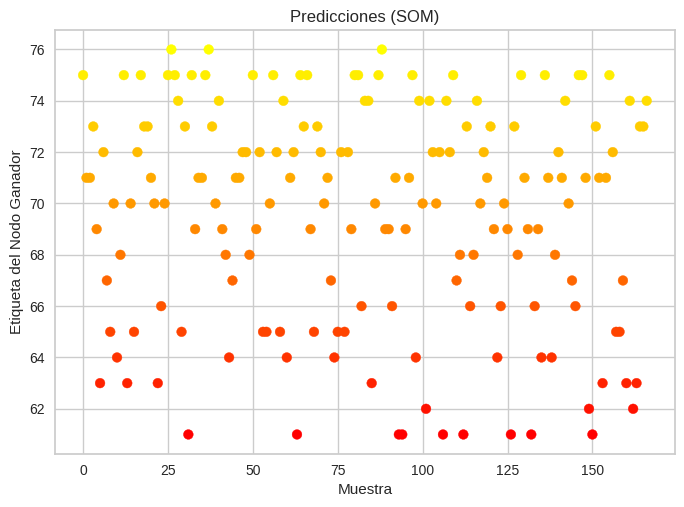

In [173]:
plt.scatter(range(len(predictions)), predictions, c=predictions, cmap='autumn')
plt.title('Predicciones (SOM)')
plt.xlabel('Muestra')
plt.ylabel('Etiqueta del Nodo Ganador')
plt.grid(True)
plt.show()

4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Comenzando con K-Means, puede observar que que algunos de los etiquetados solo alcanzan valores máximos de 8 y estos no constituyen la mayoría de las etiquetas. Teniendo en cuenta que inicialmente usé un total de 10 clústeres, podría argumentar que reduciendo el número de clústeres a un valor óptimo, como 8, se puede mejorar el proceso de clasificación eliminando los casos aislados en que la etiqueta fue igual a 8 y, en su lugar, asignarles una etiqueta más apropiada.

En cualquier caso, el método "Elbow" resultó ser muy adecuado para el conjunto de datos. El coeficiente de Silhouette fue menos satisfactorio, mientras que el índice Calinski-Harabasz mostró un buen rendimiento. Además, el índice Davies-Bouldin respaldó la idea mencionada anteriormente. Estos métodos se basan en la cantidad de clústeres, lo que nos proporciona valiosos parámetros para interpretar K-Means y la clasificación de los datos. Finalmente, el Mapa Autoorganizado (SOM), resultó ser muy útil para detectar nodos ganadores en la muestra de datos, es decir, la variable predictora.